In [1]:
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

AMOUNT_SAMPLES = 1000
TRAIN_PART = int(0.7*AMOUNT_SAMPLES)

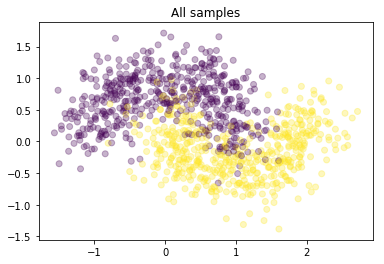

In [2]:
X, y = make_moons(n_samples=AMOUNT_SAMPLES, noise=0.3)
plt.title('All samples')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.3)
plt.show()

X_train = X[:TRAIN_PART]
y_train = y[:TRAIN_PART]

X_test  = X[TRAIN_PART:]
y_test = y[TRAIN_PART:]

In [3]:
class ForwardNN():

    @staticmethod
    def softmax(u):
        exped = np.exp(u)
        partition = np.sum(exped, axis=1, keepdims=True)
        return exped / partition

    def __init__(self, input_size, hidden_size, output_size, alpha, lambda_reg):
        self.W1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.b2 = np.zeros((1, output_size))
        
        self.alpha = alpha
        self.rlambda = lambda_reg
        
    def cost_function(self, X, y):
        n = X.shape[0]
        self.forward_prop(X)

        J = -np.sum(np.log(self.a3[np.arange(n), y])) + self.rlambda/2 * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        return J/n

    def forward_prop(self, X):
        self.a1 = X
        self.z2 = self.a1.dot(self.W1) + self.b1
        self.a2 = np.tanh(self.z2)
        self.z3 = self.a2.dot(self.W2) + self.b2
        self.a3 = self.softmax(self.z3)
        
    def predict(self, X):
        self.forward_prop(X)
        return np.argmax(self.a3, axis=1)
    
    def back_prop(self, y):
        n = y.shape[0]
        self.d3 = self.a3
        self.d3[np.arange(n), y] -= 1

        self.dW2 = self.a2.T.dot(self.d3) + self.rlambda * self.W2
        self.db2 = np.sum(self.d3, axis=0, keepdims=True)
        
        self.d2 = self.d3.dot(self.W2.T) * (1 - np.power(self.a2, 2))
        self.dW1 = self.a1.T.dot(self.d2) + self.rlambda * self.W1
        self.db1 = np.sum(self.d2, axis=0, keepdims=True)
        
        self.W2 -= self.alpha * self.dW2
        self.b2 -= self.alpha * self.db2
        self.W1 -= self.alpha * self.dW1
        self.b1 -= self.alpha * self.db1
        
    def fit(self, X, y, epochs):
        # NOTICE: Not stochastic gradient, but full batch gradient
        
        print('Initial cost: {:4.4}'.format(self.cost_function(X, y)))
        for i in range(epochs):
            self.forward_prop(X)
            self.back_prop(y)
            
            if i % 2 == 0:
                print('#{} epoch cost {:4.4}'.format(i+1, self.cost_function(X, y)))

Initial cost: 0.807
#1 epoch cost 1.043
#3 epoch cost 5.148
#5 epoch cost 3.417
#7 epoch cost 1.894
#9 epoch cost 6.407
Accuracy on test set: 0.81


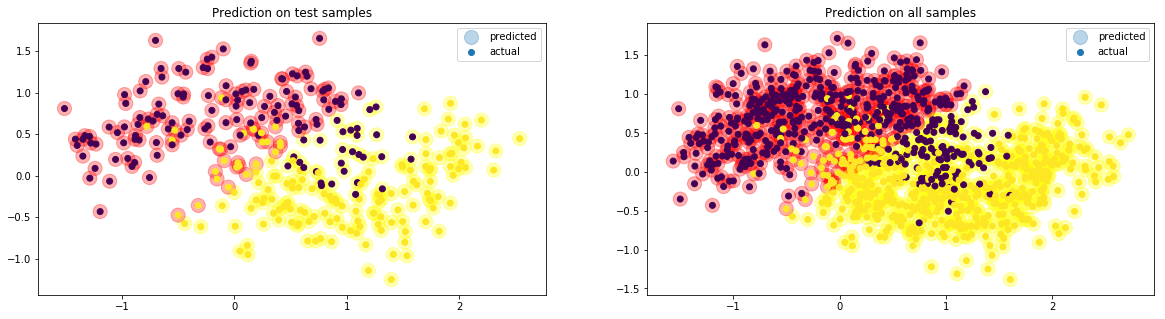

In [5]:
# Network architecture params
n_features = 2
n_hidden = 10
n_output = 2

# Hyperparameters
alpha=0.01
lambda_reg=1e-5
epochs=10

# Fitting
nn = ForwardNN(n_features, n_hidden, n_output, alpha, lambda_reg)
nn.fit(X_train, y_train, epochs)

# Visualization
y_hat = nn.predict(X_test)
print('Accuracy on test set: {:4.4}'.format(accuracy_score(y_test, y_hat)))

y_hat_all = nn.predict(X)

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Prediction on test samples')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_hat, alpha=0.3, cmap=plt.cm.autumn, s=200, label='predicted')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=1, label='actual')
plt.legend()

plt.subplot(122)
plt.title('Prediction on all samples')
plt.scatter(X[:, 0], X[:, 1], c=y_hat_all, alpha=0.3, cmap=plt.cm.autumn, s=200, label='predicted')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, label='actual')

plt.legend()
plt.show()